## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# 連接個人資料 讀取 ＰＴＴ 訓練資料和儲存模型
#先連接自己的GOOGLE DRIVE 為了要儲存資料和訓練模型
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Current directory
print(os.getcwd())

# change directory
os.chdir('/content/drive/MyDrive/python_training/PYTHON100Days/Day038-EDA_Outlier-null-fill_value/')
print(os.getcwd())

/content
/content/drive/MyDrive/python_training/PYTHON100Days/Day038-EDA_Outlier-null-fill_value


In [3]:
# 需要使用 Colab 請注意一下
# 先行確認 Colab 上面的版本
import keras
print("keras:",keras.__version__)
import tensorflow as tf
print("tf:",tf.__version__)
import sklearn
print(sklearn.__version__)

keras: 2.6.0
tf: 2.6.0
0.22.2.post1


In [4]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [15]:
df_train=pd.read_csv("Titanic_train.csv", usecols=['Survived','Sex','Age','Pclass']) ##,'Cabin','Embarked'
df_train.head(3)


,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0


In [16]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

          missing_rate
Survived      0.000000
Pclass        0.000000
Sex           0.000000
Age           0.198653


In [17]:
# 細看遺失資料的樣態
missing_index=df_train.isnull()
display(df_train[missing_index.values==True])

,Survived,Pclass,Sex,Age
5,0,3,male,NaN
17,1,2,male,NaN
19,1,3,female,NaN
26,0,3,male,NaN
28,1,3,female,NaN
...,...,...,...,...
859,0,3,male,NaN
863,0,3,female,NaN
868,0,3,male,NaN
878,0,3,male,NaN


## 觀察 Age

29.69911764705882
14.526497332334044


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


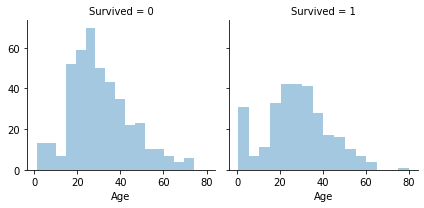

In [19]:
print(df_train['Age'].mean())
print(df_train['Age'].std())
g=sns.FacetGrid(df_train,col='Survived')
g.map(sns.distplot,'Age',kde=False)

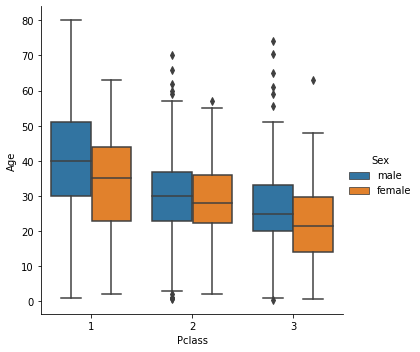

In [20]:
g=sns.catplot(x='Pclass',y='Age',hue='Sex',data=df_train,kind='box')

In [24]:
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df_train['Pclass']=le.fit_transform(df_train['Pclass'])
df_train['Sex']=le.fit_transform(df_train['Sex'])
data=df_train[['Sex','Age','Pclass']]
# KNN
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data))
display(data[missing_index.values==True])
display(df_filled[missing_index.values==True])

,Sex,Age,Pclass
5,1,NaN,2
17,1,NaN,1
19,0,NaN,2
26,1,NaN,2
28,0,NaN,2
...,...,...,...
859,1,NaN,2
863,0,NaN,2
868,1,NaN,2
878,1,NaN,2


,0,1,2
5,1.0,22.0,2.0
17,1.0,35.0,1.0
19,0.0,26.0,2.0
26,1.0,22.0,2.0
28,0.0,26.0,2.0
...,...,...,...
859,1.0,22.0,2.0
863,0.0,26.0,2.0
868,1.0,22.0,2.0
878,1.0,22.0,2.0
